<a href="https://colab.research.google.com/github/AntonioPQMartins/Finance/blob/master/Treemodel%26Lreg_predictionstockprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
df = web.DataReader('NFLX', data_source='yahoo', start='2019-05-25', end='2020-05-20')

In [0]:
df.head(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-28,361.200012,353.649994,354.390015,355.059998,4717100,355.059998
2019-05-29,353.850006,345.899994,353.600006,349.190002,5658900,349.190002
2019-05-30,354.209991,348.299988,350.549988,351.850006,4008000,351.850006
2019-05-31,349.339996,342.920013,347.220001,343.279999,5023400,343.279999
2019-06-03,347.660004,332.649994,343.559998,336.630005,7849600,336.630005
2019-06-04,353.609985,343.250000,345.000000,353.399994,7891600,353.399994
2019-06-05,357.880005,348.709991,354.380005,355.730011,5020100,355.730011


In [0]:
df.shape

(249, 6)

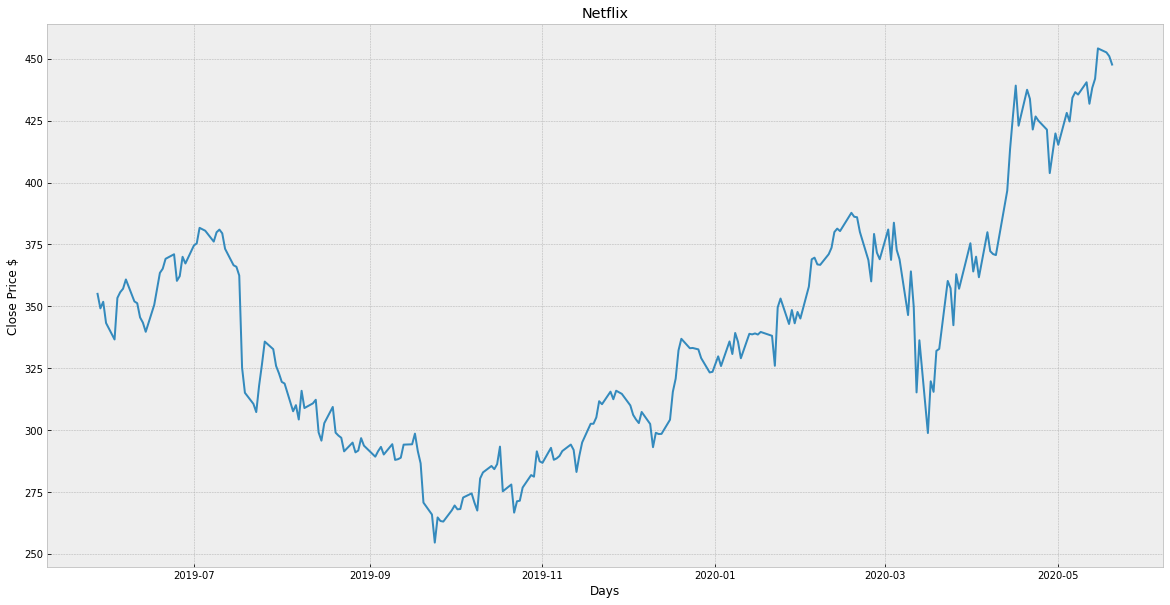

In [0]:
plt.figure(figsize=(20,10))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price $')
plt.plot(df['Close'])

plt.show()


In [0]:
df = df[['Close']]
df.head(5)

,Close
Date,
2019-05-28,355.059998
2019-05-29,349.190002
2019-05-30,351.850006
2019-05-31,343.279999
2019-06-03,336.630005


In [0]:
#Creat var to predict x days in future
future_days=25
#new col (target) 
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)
df.tail

<bound method NDFrame.tail of                  Close  Prediction
Date                              
2019-05-28  355.059998  375.429993
2019-05-29  349.190002  381.720001
2019-05-30  351.850006  380.549988
2019-05-31  343.279999  376.160004
2019-06-03  336.630005  379.929993
...                ...         ...
2020-05-14  441.950012         NaN
2020-05-15  454.190002         NaN
2020-05-18  452.579987         NaN
2020-05-19  451.040009         NaN
2020-05-20  447.670013         NaN

[249 rows x 2 columns]>

In [0]:
x =np.array(df.drop(['Prediction'],1))[:-future_days]
print(x)

In [0]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[375.42999268 381.72000122 380.54998779 376.16000366 379.92999268
 381.         379.5        373.25       366.6000061  365.98999023
 362.44000244 325.20999146 315.1000061  310.61999512 307.29998779
 317.94000244 326.45999146 335.77999878 332.70001221 325.92999268
 322.98999023 319.5        318.82998657 307.63000488 310.1000061
 304.29000854 315.8999939  308.92999268 310.82998657 312.27999878
 299.10998535 295.76000977 302.79998779 309.38000488 298.98999023
 297.80999756 296.92999268 291.44000244 294.98001099 291.02999878
 291.76998901 296.77999878 293.75       289.29000854 291.51998901
 293.25       290.17001343 294.33999634 287.98999023 288.26998901
 288.85998535 294.1499939  294.29000854 298.6000061  291.55999756
 286.6000061  270.75       265.92001343 254.58999634 264.75
 263.30999756 263.07998657 267.61999512 269.57998657 268.02999878
 268.1499939  272.79000854 274.45999146 270.72000122 267.52999878
 280.48001099 282.92999268 285.52999878 284.25       286.27999878
 293.3500061  275

In [0]:
#Split 0.75 0.25 training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)


In [0]:
#Create models - decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#linear reg.model
lr = LinearRegression().fit(x_train,y_train)



In [0]:
#Get last rows
x_future= df.drop(['Prediction'],1)[:-future_days]
x_future= x_future.tail(future_days)
x_future= np.array(x_future)
x_future

array([[349.92001343],
       [315.25      ],
       [336.29998779],
       [298.83999634],
       [319.75      ],
       [315.47000122],
       [332.02999878],
       [332.82998657],
       [360.26998901],
       [357.32000732],
       [342.39001465],
       [362.98999023],
       [357.11999512],
       [370.95999146],
       [375.5       ],
       [364.07998657],
       [370.07998657],
       [361.76000977],
       [379.95999146],
       [372.27999878],
       [371.11999512],
       [370.72000122],
       [396.72000122],
       [413.54998779],
       [426.75      ]])

In [0]:
#model tree
tree_prediction= tree.predict(x_future)
print(tree_prediction)
print()
#lin.reg.pre
lr_prediction=lr.predict(x_future)
print(lr_prediction)



[307.29998779 426.70001221 437.48999023 266.69000244 421.42001343
 426.70001221 424.98999023 421.38000488 403.82998657 411.89001465
 368.76998901 326.45999146 373.04499817 424.67999268 434.26000977
 436.52999878 435.54998779 440.51998901 431.82000732 438.26998901
 441.95001221 454.19000244 357.32000732 357.32000732 357.32000732]

[348.7330737  324.90910409 339.37388849 313.63274767 328.00134008
 325.06028091 336.43970767 336.98943012 355.84519969 353.81807979
 343.55873298 357.7142854  353.6806387  363.19097975 366.31070815
 358.46329115 362.58627247 356.86908765 369.37545173 364.09804068
 363.30092844 363.02606721 380.89231959 392.45727296 401.52784024]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


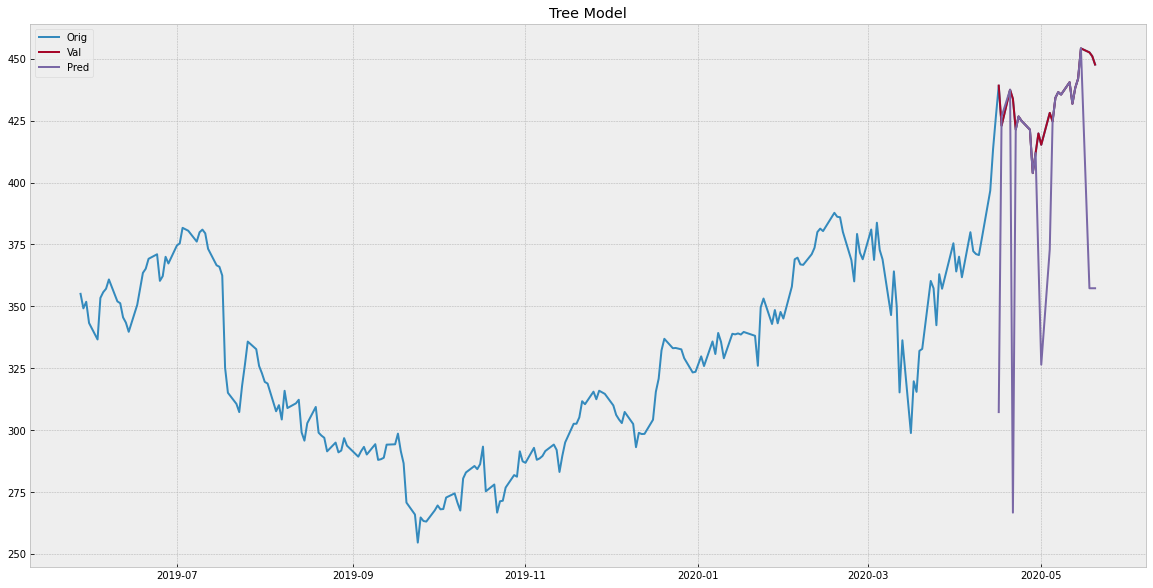

In [0]:
#Visualize the data
predictions= tree_prediction

valid= df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Tree Model')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


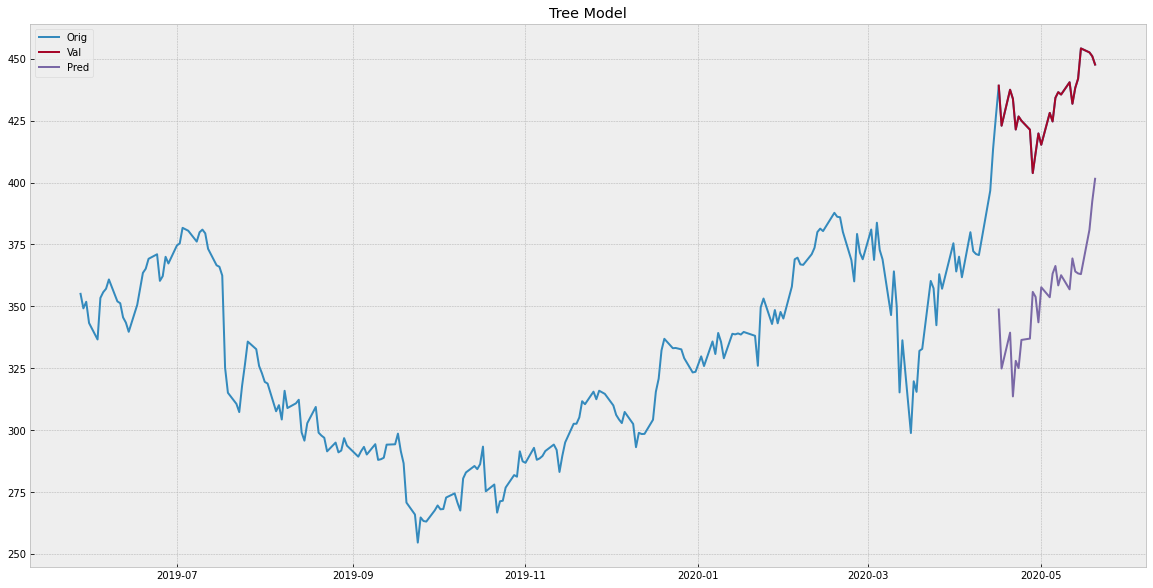

In [0]:
predictions= lr_prediction

valid= df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Tree Model')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()